#linear fit

In [5]:
from scipy.io import loadmat

mat = loadmat('/content/PFC_100_CH47_0.continuous (1).mat')

 # Inspect keys
print(mat.keys())


dict_keys(['__header__', '__version__', '__globals__', 'PFC'])


In [8]:
hpc = mat['PFC']
print(type(hpc))
print(hpc.dtype)
print(hpc.shape)
print(hpc)


<class 'numpy.ndarray'>
float64
(2700425, 1)
[[-8.62361739e+01]
 [-9.26086177e+01]
 [-6.46005419e+01]
 ...
 [ 1.17053661e-14]
 [-2.36410339e-15]
 [ 4.27794433e-16]]


In [10]:
#as freq not given
signal = mat['PFC'].squeeze()  # Now shape is (2700425,)
fs = 1250  #  sampling frequency  (commonly 1000–1250 Hz)


In [12]:
print(f"Sampling Rate (assumed): {fs} Hz")
print(f"Signal Duration: {len(signal)/fs:.2f} seconds")

Sampling Rate (assumed): 1250 Hz
Signal Duration: 2160.34 seconds


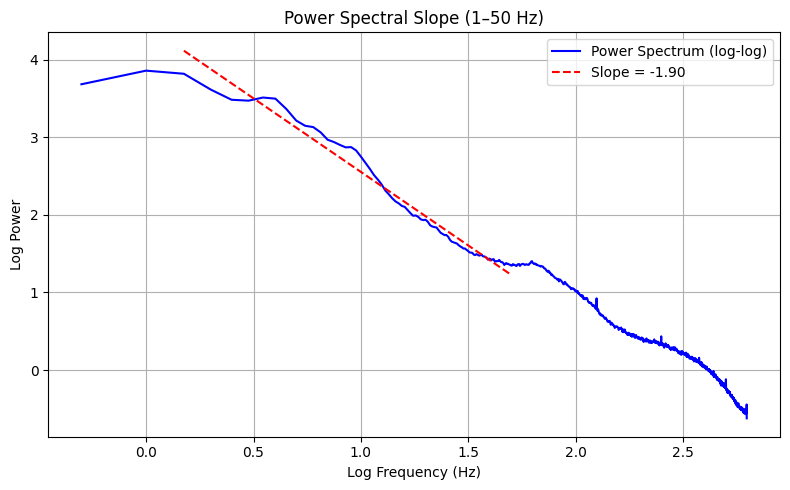

In [13]:
import numpy as np
from scipy.signal import welch
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Compute Power Spectral Density
frequencies, power = welch(signal, fs=fs, nperseg=fs*2)

# Convert to log-log
log_freq = np.log10(frequencies[1:])  # Skip 0 Hz
log_power = np.log10(power[1:])

# Fit linear slope in the 1–50 Hz range
fit_mask = (frequencies[1:] > 1) & (frequencies[1:] < 50)
slope, intercept, *_ = linregress(log_freq[fit_mask], log_power[fit_mask])

# Plot
plt.figure(figsize=(8, 5))
plt.plot(log_freq, log_power, label='Power Spectrum (log-log)', color='blue')
plt.plot(log_freq[fit_mask], slope * log_freq[fit_mask] + intercept, 'r--', label=f'Slope = {slope:.2f}')
plt.xlabel('Log Frequency (Hz)')
plt.ylabel('Log Power')
plt.title('Power Spectral Slope (1–50 Hz)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# FOOOF

In [97]:
import pandas as pd

# Flatten the signal
signal = data['PFC'].squeeze()

# Convert to a DataFrame
df = pd.DataFrame(signal, columns=['Amplitude'])

# Display first few rows
df.head()


,Amplitude
0,-86.236174
1,-92.608618
2,-64.600542
3,-9.323761
4,-11.899743


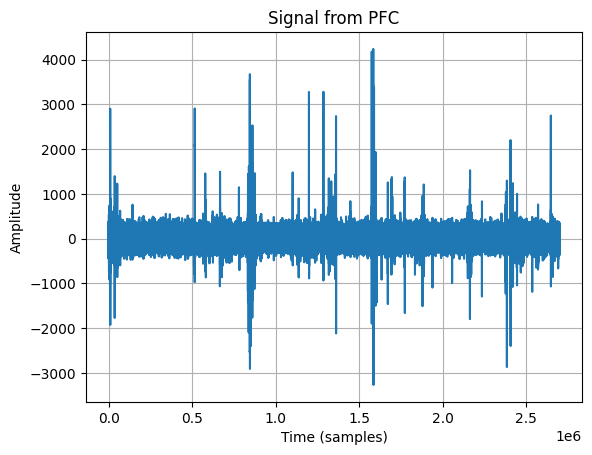

In [98]:
import matplotlib.pyplot as plt

plt.plot(df['Amplitude'])
plt.title('Signal from PFC')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


In [15]:
!pip install fooof
from fooof import FOOOF
from scipy.signal import welch
import numpy as np
import matplotlib.pyplot as plt


<ipython-input-15-7befaae2ac83>:2: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOF


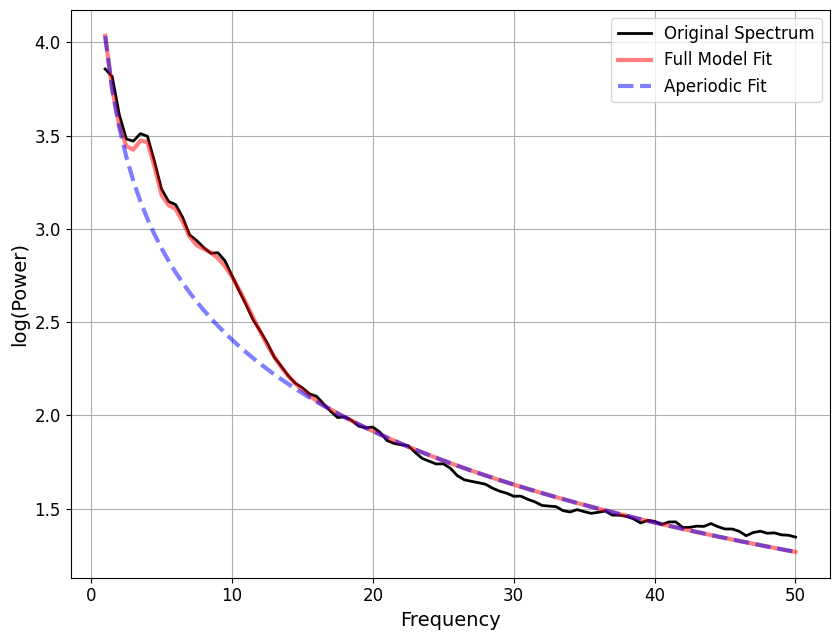

In [16]:
# Computing  Power Spectral Density
frequencies, power = welch(signal, fs=fs, nperseg=fs*2)

# Trimming  to clean range for FOOOF (e.g., 1–50 Hz)
freq_mask = (frequencies >= 1) & (frequencies <= 50)
freqs_trimmed = frequencies[freq_mask]
power_trimmed = power[freq_mask]

# Run FOOOF
fm = FOOOF(peak_width_limits=[1, 12], max_n_peaks=6, verbose=True)
fm.fit(freqs_trimmed, power_trimmed)

# Plot results
fm.plot()


In [17]:
# View slope, offset, and any detected peaks
print(f"Aperiodic Exponent (Slope): {fm.aperiodic_params_[1]:.2f}")
print(f"Aperiodic Offset: {fm.aperiodic_params_[0]:.2f}")
print("\nDetected Peaks (Center Freq | Power | Bandwidth):")
print(fm.peak_params_)


Aperiodic Exponent (Slope): 1.63
Aperiodic Offset: 4.03

Detected Peaks (Center Freq | Power | Bandwidth):
[[3.97893857 0.4119678  1.47215372]
 [5.96358258 0.34044077 1.3342157 ]
 [9.09260661 0.36315576 4.75652859]]


# Comparsion

FOOOF good for giving:Detailed analysis of 1/f(aperiodic) + peaks(periodic) with peaks being good for represnting frequencies of rhythmic bursts (e.g., theta, alpha)

Detecting presence/absence of oscillations
Group comparisons, high-throughput
Info on each peak: center freq, amplitude, bandwidth



Linear fit good for quick 1/f  estimate



Steeper (more negative) slope=>LOW freq..synchronized activity  linked to offline or inhibtion
Flatter (less negative) slope =>high frq..desynchronized activity linked to excitation and engagement

three phaes activity::  

NREM=>Steepest (most negative) in sleep disorders it get more flatten
REM=>Intermediate or flat
Wake=>Flattest (least negative)